In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./nats/300_data_notifications.csv')
print(df.head())
print(len(df))

                        _id      createdAt  receivedByConsumerAt  \
0  66a62ad74bfd132376008624  1722165975151         1722165975146   
1  66a62ad84bfd132376008625  1722165976185         1722165976182   
2  66a62ad84bfd132376008626  1722165976192         1722165976189   
3  66a62ad84bfd132376008627  1722165976199         1722165976196   
4  66a62ad84bfd132376008628  1722165976207         1722165976204   

   sentFromBrokerAt  updatedAt  
0     1722165975137          0  
1     1722165975137          0  
2     1722165975137          0  
3     1722165975149          0  
4     1722165975147          0  
285167


In [8]:
# Convert columns to integer type if needed
df['receivedByConsumerAt'] = pd.to_numeric(df['receivedByConsumerAt'], errors='coerce')
df['sentFromBrokerAt'] = pd.to_numeric(df['sentFromBrokerAt'], errors='coerce')

In [9]:
df['e2eLatency'] = df['receivedByConsumerAt'] - df['sentFromBrokerAt']

In [10]:
print(df.head())

                        _id      createdAt  receivedByConsumerAt  \
0  66a62ad74bfd132376008624  1722165975151         1722165975146   
1  66a62ad84bfd132376008625  1722165976185         1722165976182   
2  66a62ad84bfd132376008626  1722165976192         1722165976189   
3  66a62ad84bfd132376008627  1722165976199         1722165976196   
4  66a62ad84bfd132376008628  1722165976207         1722165976204   

   sentFromBrokerAt  updatedAt  e2eLatency  
0     1722165975137          0           9  
1     1722165975137          0        1045  
2     1722165975137          0        1052  
3     1722165975149          0        1047  
4     1722165975147          0        1057  


In [11]:
df.to_csv('data_300_nats_with_latency.csv', index=False)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df_sorted = df.sort_values(by='e2eLatency').reset_index(drop=True)

percentiles = df_sorted['e2eLatency'].quantile([0.50, 0.70, 0.90, 0.95, 0.99])
print(percentiles)

0.50    308751.0
0.70    411141.0
0.90    502163.4
0.95    515362.7
0.99    527748.0
Name: e2eLatency, dtype: float64


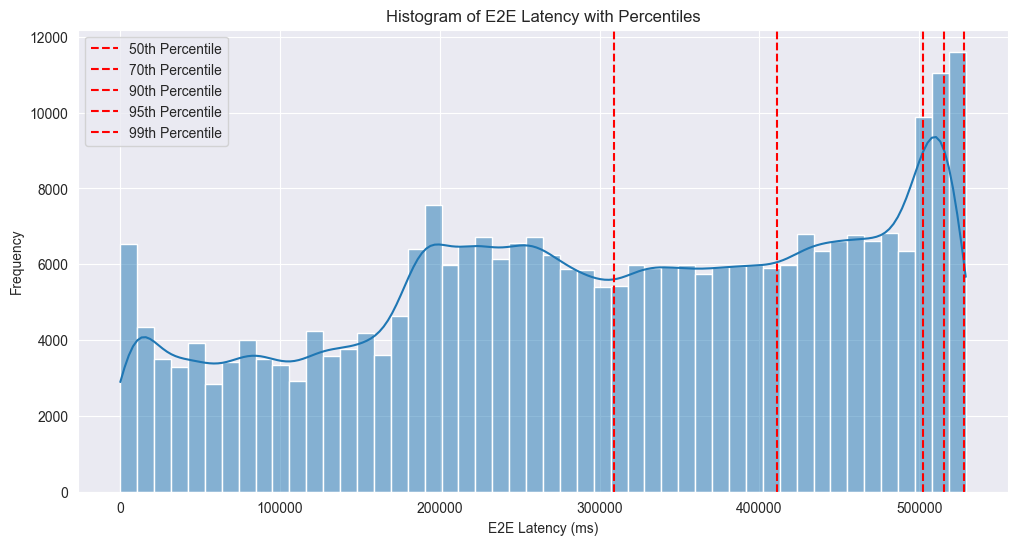

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df_sorted['e2eLatency'], bins=50, kde=True)

# Tambahkan garis vertikal untuk persentil
for p in [0.50, 0.70, 0.90, 0.95, 0.99]:
    plt.axvline(percentiles[p], color='r', linestyle='--', label=f'{int(p*100)}th Percentile')

plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())

plt.title('Histogram of E2E Latency with Percentiles')
plt.xlabel('E2E Latency (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

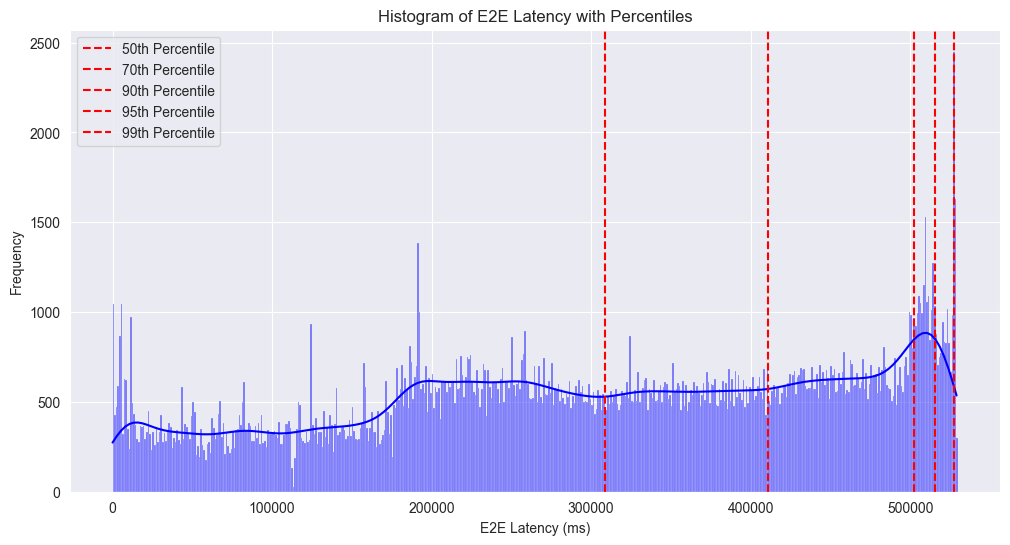

In [15]:
# Tentukan rentang bin
min_latency = df_sorted['e2eLatency'].min()
max_latency = df_sorted['e2eLatency'].max()
bin_range = range(int(min_latency), int(max_latency) + 1000, 1000)

# Visualisasikan histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_sorted['e2eLatency'], bins=bin_range, kde=True, color='blue')

# Tambahkan garis vertikal untuk persentil
for p in [0.50, 0.70, 0.90, 0.95, 0.99]:
    plt.axvline(percentiles[p], color='r', linestyle='--', label=f'{int(p*100)}th Percentile')

plt.title('Histogram of E2E Latency with Percentiles')
plt.xlabel('E2E Latency (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
start_time_ms = 1722165972870
end_time_ms = 1722167935730
data_received_mongo = 285167   
#data_received_postgres = 285167   
#data_loss_nats = 0

# Hitung total waktu pengujian dalam milidetik
total_time_ms = end_time_ms - start_time_ms

# Konversi total waktu ke detik
total_time_seconds = total_time_ms / 1000

# Hitung throughput
throughput = data_received_mongo / total_time_seconds


# Konversi total waktu ke jam
total_time_hours = total_time_seconds / 3600

# Konversi total waktu ke menit
total_time_minutes = total_time_seconds / 60

# Tampilkan hasil
print(f"Total waktu pengujian milish : {total_time_ms: .3f}")
print(f"Total waktu pengujian: {total_time_seconds:.3f} detik ({total_time_hours:.3f} jam) ({total_time_minutes:.3f} menit)")
print(f"Total event yang diproses: {data_received_mongo}")
print(f"Throughput: {throughput:.2f} events/second")

Total waktu pengujian milish :  1962860.000
Total waktu pengujian: 1962.860 detik (0.545 jam) (32.714 menit)
Total event yang diproses: 285167
Throughput: 145.28 events/second


In [6]:
# using actual data from csv

start_time_ms = df['sentFromBrokerAt'].min()
end_time_ms = df['receivedByConsumerAt'].max()
data_received_mongo = len(df)
#data_received_postgres = 5757095 
#data_loss = 0

# Hitung total waktu pengujian dalam milidetik
total_time_ms = end_time_ms - start_time_ms

# Konversi total waktu ke detik
total_time_seconds = total_time_ms / 1000

# Hitung throughput
throughput = data_received_mongo / total_time_seconds


# Konversi total waktu ke jam
total_time_hours = total_time_seconds / 3600

# Konversi total waktu ke menit
total_time_minutes = total_time_seconds / 60

# Tampilkan hasil
print(f"Total waktu pengujian milish : {total_time_ms: .3f}")
print(f"Total waktu pengujian: {total_time_seconds:.3f} detik ({total_time_hours:.3f} jam) ({total_time_minutes:.3f} menit)")
print(f"Total event yang diproses: {data_received_mongo}")
print(f"Throughput: {throughput:.2f} events/second")

Total waktu pengujian milish :  2136710.000
Total waktu pengujian: 2136.710 detik (0.594 jam) (35.612 menit)
Total event yang diproses: 285167
Throughput: 133.46 events/second
